In [16]:
import pandas as pd
import numpy
import xlrd
import re
import numpy as np
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', 500)

In [37]:
sheets = list(range(1,20))


xls = xlrd.open_workbook('MPG_data/Source/Stats MPG-saison6MPG.xlsx', on_demand=True)
sheet_names= xls.sheet_names()
data = pd.DataFrame()
o = 7

for n in sheets :   
    temp_data = pd.read_excel('MPG_data/Source/Stats MPG-saison6MPG.xlsx',skiprows = 6,sheet_name = n+1,encoding = 'latin-1')
    pattern = re.compile("^J")

    # apply regex
    num_match = len(temp_data.columns) - 7 
    headers = ['Poste','Cote','Nom','Titula','Entres','Buts','Moyenne']
    for match in range(1,num_match+1) :
        headers.append('Match{}'.format(match))
        match += 1

    # set new list as column headers
    temp_data.columns = headers
    
    temp_data['team'] = sheet_names[n+1]
    temp_data.drop(temp_data.tail(1).index,inplace=True)
    
    
    
    data = pd.concat([data,temp_data])

print(str(num_match)+ ': match loaded')

matches = [col for col in data.columns if 'Match' in col]


data['var'] = data[data.columns.intersection(matches)].var(axis=1)
    
    

38: match loaded


In [39]:
data.head(50)

,Poste,Cote,Nom,Titula,Entres,Buts,Moyenne,Match1,Match2,Match3,Match4,Match5,Match6,Match7,Match8,Match9,Match10,Match11,Match12,Match13,Match14,Match15,Match16,Match17,Match18,Match19,Match20,Match21,Match22,Match23,Match24,Match25,Match26,Match27,Match28,Match29,Match30,Match31,Match32,Match33,Match34,Match35,Match36,Match37,Match38,team,var
0,G,21.0,Lopes Anthony,34.0,NaN,NaN,5.514706,NaN,NaN,5.5,4.5,5.0,4.5,7.0,5.5,4.0,7.0,6.0,5.0,5.0,7.0,5.5,4.5,5.0,5.5,5.5,5.5,8.0,6.0,7.0,5.5,5.5,5.0,5.0,5.5,NaN,6.0,3.5,5.0,4.5,4.5,5.0,8.0,6.0,NaN,OL,1.083111
1,G,6.0,Gorgelin Mathieu,4.0,NaN,NaN,5.750000,6.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,OL,0.916667
2,D,7.0,Morel Jérémy,12.0,NaN,NaN,5.041667,6.0,5.0,5.5,NaN,NaN,NaN,7.0,5.0,3.0,NaN,NaN,NaN,3.5,NaN,NaN,4.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,5.0,OL,1.339015
3,D,8.0,Rafael,11.0,7.0,(-1),4.972222,NaN,5.0,5.5,5,4.5,NaN,6.5,5.0,5.5,NaN,5.0,5.0,5.0,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.5,NaN,4.5,5.5,2.5,5.0,NaN,NaN,NaN,5.0,5.0,NaN,OL,0.602124
4,D,3.0,Yanga-Mbiwa Mapou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OL,NaN
5,D,9.0,Marçal,12.0,NaN,NaN,5.291667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,6.0,5.0,NaN,NaN,6.0,5.0,NaN,NaN,6.0,5.5,5.0,NaN,NaN,NaN,NaN,5.0,5.0,NaN,NaN,5.0,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,OL,0.202652
6,D,16.0,Marcelo,33.0,NaN,(-1),5.575758,6.0,4.5,5.5,5,5.0,5.5,NaN,5.5,NaN,8.0,6.0,5.5,6.0,6.0,4.5,4.0,NaN,6.0,6.0,5.5,5.5,7.0,6.0,5.0,6.0,4.5,6.5,5.0,NaN,6.0,4.0,NaN,6.0,5.5,5.0,5.5,6.0,6.0,OL,0.658144
7,D,14.0,Mendy Ferland,27.0,3.0,2,5.216667,6.0,5.0,7.0,5.5,4.5,5.0,NaN,NaN,3.5,5.5,NaN,4.5,5.0,6.0,5.0,3.0,5.0,7.5,4.5,5.0,5.0,5.0,6.0,6.0,5.0,3.5,6.0,4.5,NaN,NaN,NaN,NaN,NaN,5.0,5.0,7.0,6.5,4.5,OL,1.046264
8,D,16.0,Dubois Léo,21.0,4.0,1,5.340000,5.0,4.0,NaN,NaN,NaN,5.5,6.0,4.5,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.5,7.0,5.0,6.5,5.5,5.0,4.0,6.5,5.5,7.0,7.0,4.0,4.0,5.0,4.5,4.5,6.5,6.0,6.0,OL,1.035833
9,D,17.0,Denayer Jason,31.0,NaN,2,5.290323,NaN,NaN,NaN,5,5.5,5.0,6.0,NaN,3.5,6.0,5.5,5.5,5.5,7.0,5.0,4.0,5.0,6.0,6.0,5.0,5.5,7.0,7.0,5.5,5.5,4.0,6.0,4.5,6.0,5.5,3.0,4.0,6.0,4.5,4.5,NaN,NaN,NaN,OL,0.946237


In [40]:
## over7
matches = [col for col in data.columns if 'Match' in col]

histo = pd.melt(data,id_vars=['Nom'], value_vars=matches)

In [41]:
histo.head()

,Nom,variable,value
0,Lopes Anthony,Match1,NaN
1,Gorgelin Mathieu,Match1,6
2,Morel Jérémy,Match1,6
3,Rafael,Match1,NaN
4,Yanga-Mbiwa Mapou,Match1,NaN


,Nom,variable,value
55,Mbappé Kylian,Match1,NaN
616,Mbappé Kylian,Match2,7.5
1177,Mbappé Kylian,Match3,7
1738,Mbappé Kylian,Match4,7
2299,Mbappé Kylian,Match5,NaN
2860,Mbappé Kylian,Match6,NaN
3421,Mbappé Kylian,Match7,NaN
3982,Mbappé Kylian,Match8,7
4543,Mbappé Kylian,Match9,9
5104,Mbappé Kylian,Match10,7


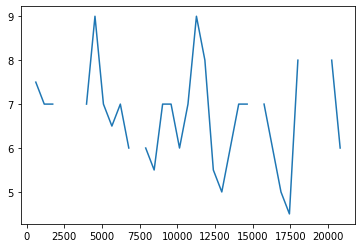

In [42]:
def player_hist(data = histo, name = 'Mbappé Kylian'):
    temp_player = data[data['Nom'] == name]
    plt.plot(temp_player['value'])
    return temp_player

temp = player_hist()
temp

In [22]:
list(temp['value'])[1]

7.5

In [44]:
data.to_csv('MPG_data/players.csv',encoding = 'latin-1')
histo.to_csv('MPG_data/historic.csv',encoding = 'latin-1')

In [45]:
players = pd.read_csv('MPG_Data/players.csv',encoding = 'latin-1')

In [56]:
print(players['Nom'].replace('\xa0',' '))

0           Lopes Anthony
1        Gorgelin Mathieu
2            Morel Jérémy
3                  Rafael
4       Yanga-Mbiwa Mapou
5                  Marçal
6                 Marcelo
7           Mendy Ferland
8              Dubois Léo
9           Denayer Jason
10            Solet Oumar
11             Tete Kenny
12           Ferri Jordan
13          Tousart Lucas
14        NDombele Tanguy
15            Pape Cheikh
16         Terrier Martin
17          Aouar Houssem
18          Depay Memphis
19                Mariano
20        Traoré Bertrand
21            Fekir Nabil
22           Gouiri Amine
23         Dembele Moussa
24           Pintor Lenny
25           Fekir Yassin
26          Cornet Maxwel
27        Areola Alphonse
28       Buffon Gianluigi
29           Thiago Silva
              ...        
531       Dingome Tristan
532          Kyei Grejohn
533       Chavarria Pablo
534        Pinson Virgile
535          Suk Hyun-Jun
536        Bernadoni Paul
537      Valette Baptiste
538        S

In [48]:
historic = pd.read_csv('MPG_Data/historic.csv',encoding = 'latin-1')
historic

,Unnamed: 0,Nom,variable,value
0,0,Lopes Anthony,Match1,NaN
1,1,Gorgelin Mathieu,Match1,6.0
2,2,Morel Jérémy,Match1,6.0
3,3,Rafael,Match1,NaN
4,4,Yanga-Mbiwa Mapou,Match1,NaN
5,5,Marçal,Match1,NaN
6,6,Marcelo,Match1,6.0
7,7,Mendy Ferland,Match1,6.0
8,8,Dubois Léo,Match1,5.0
9,9,Denayer Jason,Match1,NaN
